In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shakespeare/Shakespeare_data.csv


In [2]:
df_cleaned = pd.read_csv(os.path.join(dirname,"Shakespeare_data.csv"))

In [3]:
import numpy as np
import pandas as pd
#import nltk
#from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer
import os
import time
import tensorflow as tf
import io

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df_cleaned['Lines'] = df_cleaned['Player'] + ': ' + df_cleaned['PlayerLine'] 
df_cleaned.head()

Dataline      Play  PlayerLinenumber ActSceneLine         Player  \
0         1  Henry IV               NaN          NaN            NaN   
1         2  Henry IV               NaN          NaN            NaN   
2         3  Henry IV               NaN          NaN            NaN   
3         4  Henry IV               1.0        1.1.1  KING HENRY IV   
4         5  Henry IV               1.0        1.1.2  KING HENRY IV   

                                          PlayerLine  \
0                                              ACT I   
1                       SCENE I. London. The palace.   
2  Enter KING HENRY, LORD JOHN OF LANCASTER, the ...   
3             So shaken as we are, so wan with care,   
4         Find we a time for frighted peace to pant,   

                                               Lines  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3  KING HENRY IV: So shaken as we are, so wan wit...  
4  KING HENRY IV: Find we a time for frighted pea...

In [5]:
df_filter = df_cleaned['Lines'].dropna().reset_index()
df_filter

index                                              Lines
0            3  KING HENRY IV: So shaken as we are, so wan wit...
1            4  KING HENRY IV: Find we a time for frighted pea...
2            5  KING HENRY IV: And breathe short-winded accent...
3            6  KING HENRY IV: To be commenced in strands afar...
4            7  KING HENRY IV: No more the thirsty entrance of...
...        ...                                                ...
111384  111391  LEONTES: Lead us from hence, where we may leis...
111385  111392     LEONTES: Each one demand an answer to his part
111386  111393  LEONTES: Perform'd in this wide gap of time si...
111387  111394    LEONTES: We were dissever'd: hastily lead away.
111388  111395                                    LEONTES: Exeunt

[111389 rows x 2 columns]

In [6]:
#concatenate player and playerline_clean 

# df_cleaned['lines'] = df_cleaned['player'] + ': ' + df_cleaned['playerline_clean'] + '.'
# df_cleaned.head(2)

In [7]:
#stop_words = set(stopwords.words("english"))
#lemmatizer = WordNetLemmatizer()

corpus = []
for text in df_filter['Lines']:
    # Convert to list from string
    text = text.split()
    
    # Lemmatization and removing stop words
   # text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
    text = " ".join(text)
    corpus.append(text)

In [8]:
text = ' '.join(corpus)

In [9]:
text

"KING HENRY IV: So shaken as we are, so wan with care, KING HENRY IV: Find we a time for frighted peace to pant, KING HENRY IV: And breathe short-winded accents of new broils KING HENRY IV: To be commenced in strands afar remote. KING HENRY IV: No more the thirsty entrance of this soil KING HENRY IV: Shall daub her lips with her own children's blood, KING HENRY IV: Nor more shall trenching war channel her fields, KING HENRY IV: Nor bruise her flowerets with the armed hoofs KING HENRY IV: Of hostile paces: those opposed eyes, KING HENRY IV: Which, like the meteors of a troubled heaven, KING HENRY IV: All of one nature, of one substance bred, KING HENRY IV: Did lately meet in the intestine shock KING HENRY IV: And furious close of civil butchery KING HENRY IV: Shall now, in mutual well-beseeming ranks, KING HENRY IV: March all one way and be no more opposed KING HENRY IV: Against acquaintance, kindred and allies: KING HENRY IV: The edge of war, like an ill-sheathed knife, KING HENRY IV: 

In [10]:
# number of characters in it
print(f'Length of text: {len(text)} characters')

Length of text: 5540761 characters


In [11]:
# first 250 characters in text
print(text[:250])

KING HENRY IV: So shaken as we are, so wan with care, KING HENRY IV: Find we a time for frighted peace to pant, KING HENRY IV: And breathe short-winded accents of new broils KING HENRY IV: To be commenced in strands afar remote. KING HENRY IV: No mor


In [12]:
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

76 unique characters


In [13]:
ids_from_chars = tf.keras.layers.StringLookup(
    vocabulary=list(vocab), mask_token=None)

In [14]:
chars_from_ids = tf.keras.layers.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)

In [15]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

In [16]:
all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
all_ids

<tf.Tensor: shape=(5540761,), dtype=int64, numpy=array([33, 31, 36, ..., 71, 64, 70])>

In [17]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

In [18]:
for ids in ids_dataset.take(30):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

K
I
N
G
 
H
E
N
R
Y
 
I
V
:
 
S
o
 
s
h
a
k
e
n
 
a
s
 
w
e


In [19]:
seq_length = 100

In [20]:
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

for seq in sequences.take(1):
  print(chars_from_ids(seq))

tf.Tensor(
[b'K' b'I' b'N' b'G' b' ' b'H' b'E' b'N' b'R' b'Y' b' ' b'I' b'V' b':'
 b' ' b'S' b'o' b' ' b's' b'h' b'a' b'k' b'e' b'n' b' ' b'a' b's' b' '
 b'w' b'e' b' ' b'a' b'r' b'e' b',' b' ' b's' b'o' b' ' b'w' b'a' b'n'
 b' ' b'w' b'i' b't' b'h' b' ' b'c' b'a' b'r' b'e' b',' b' ' b'K' b'I'
 b'N' b'G' b' ' b'H' b'E' b'N' b'R' b'Y' b' ' b'I' b'V' b':' b' ' b'F'
 b'i' b'n' b'd' b' ' b'w' b'e' b' ' b'a' b' ' b't' b'i' b'm' b'e' b' '
 b'f' b'o' b'r' b' ' b'f' b'r' b'i' b'g' b'h' b't' b'e' b'd' b' ' b'p'
 b'e' b'a' b'c'], shape=(101,), dtype=string)


In [21]:
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy())

b'KING HENRY IV: So shaken as we are, so wan with care, KING HENRY IV: Find we a time for frighted peac'
b'e to pant, KING HENRY IV: And breathe short-winded accents of new broils KING HENRY IV: To be commenc'
b'ed in strands afar remote. KING HENRY IV: No more the thirsty entrance of this soil KING HENRY IV: Sh'
b"all daub her lips with her own children's blood, KING HENRY IV: Nor more shall trenching war channel "
b'her fields, KING HENRY IV: Nor bruise her flowerets with the armed hoofs KING HENRY IV: Of hostile pa'


In [22]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

In [23]:
dataset = sequences.map(split_input_target)

In [24]:
for input_example, target_example in dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())

Input : b'KING HENRY IV: So shaken as we are, so wan with care, KING HENRY IV: Find we a time for frighted pea'
Target: b'ING HENRY IV: So shaken as we are, so wan with care, KING HENRY IV: Find we a time for frighted peac'


In [25]:
# Batch size
BATCH_SIZE = 100

BUFFER_SIZE = 20000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(100, 100), dtype=tf.int64, name=None), TensorSpec(shape=(100, 100), dtype=tf.int64, name=None))>

In [26]:
# Length of the vocabulary in StringLookup Layer
vocab_size = len(ids_from_chars.get_vocabulary())

# The embedding dimension
embedding_dim = 512

# Number of RNN units
rnn_units = 1024

In [27]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

In [28]:
model = MyModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [29]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(100, 100, 77) # (batch_size, sequence_length, vocab_size)


In [30]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  39424     
                                                                 
 gru (GRU)                   multiple                  4724736   
                                                                 
 dense (Dense)               multiple                  78925     
                                                                 
Total params: 4,843,085
Trainable params: 4,843,085
Non-trainable params: 0
_________________________________________________________________


In [31]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()

In [32]:
sampled_indices

array([29,  9, 41, 14, 72, 76, 42, 29, 60, 64, 65, 43,  9, 51, 22, 56, 50,
       51, 56, 22, 15, 33, 15, 35, 62, 53, 12, 34, 17, 41, 41, 74,  5,  0,
       40, 51, 50, 74, 15, 61, 24, 71, 60, 66,  4, 55, 64, 64, 18, 64,  9,
       42, 15, 65, 70, 44, 69, 48, 66, 24, 50, 22, 19, 18, 66, 52, 17, 65,
       76, 57, 17, 13, 29, 63, 24, 42,  8, 21, 63, 56, 57,  8,  9, 26, 16,
       36, 19, 14, 67, 23, 24, 57, 67, 60, 50, 39,  1, 28,  5, 61])

In [33]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())

Input:
 b' her replete with modesty, KING EDWARD IV: Her words do show her wit incomparable, KING EDWARD IV: A'

Next Char Predictions:
 b"G-S3vzTGjnoU-a?f]af?4K4Mlc1L6SSx'[UNK]Ra]x4kBujp$enn7n-T4otVsZpB]?87pb6ozg62GmBT,:mfg,-D5N83qABgqj]Q F'k"


In [34]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [50]:
example_batch_mean_loss = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", example_batch_mean_loss)

Prediction shape:  (100, 100, 77)  # (batch_size, sequence_length, vocab_size)
Mean loss:         tf.Tensor(4.344583, shape=(), dtype=float32)


In [36]:
tf.exp(example_batch_mean_loss).numpy()

77.0599

In [37]:
model.compile(optimizer='adam', loss=loss)

In [38]:
# Directory where the checkpoints will be saved
checkpoint_dir = '../data/training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [39]:
EPOCHS = 30

In [40]:
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/30
548/548 [==============================] - 62s 102ms/step - loss: 1.9936
Epoch 2/30
548/548 [==============================] - 59s 101ms/step - loss: 1.3557
Epoch 3/30
548/548 [==============================] - 59s 101ms/step - loss: 1.2467
Epoch 4/30
548/548 [==============================] - 59s 101ms/step - loss: 1.1975
Epoch 5/30
548/548 [==============================] - 59s 101ms/step - loss: 1.1638
Epoch 6/30
548/548 [==============================] - 59s 101ms/step - loss: 1.1388
Epoch 7/30
548/548 [==============================] - 60s 101ms/step - loss: 1.1159
Epoch 8/30
548/548 [==============================] - 59s 101ms/step - loss: 1.0960
Epoch 9/30
548/548 [==============================] - 59s 101ms/step - loss: 1.0778
Epoch 10/30
548/548 [==============================] - 59s 101ms/step - loss: 1.0610
Epoch 11/30
548/548 [==============================] - 59s 101ms/step - loss: 1.0450
Epoch 12/30
548/548 [==============================] - 60s 101ms/step - lo

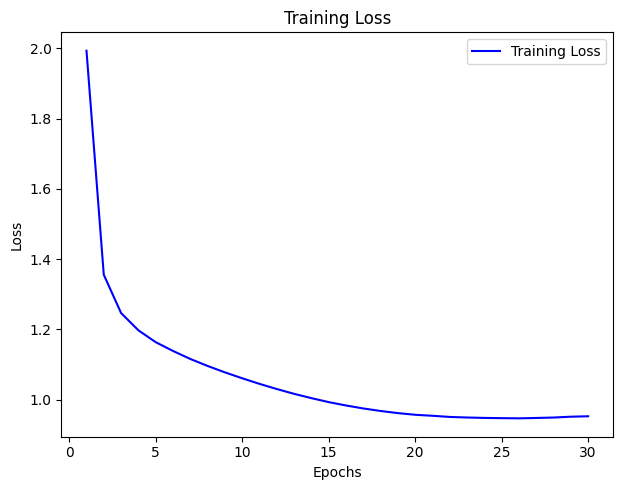

In [56]:
import matplotlib.pyplot as plt

# Retrieve training history
loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']

# Create plot
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 5))

# Plot loss values
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [47]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=0.07):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states

In [48]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

In [49]:
start = time.time()
states = None
next_char = tf.constant(['Hamlet:'])
result = [next_char]

for n in range(500):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*100)
print('\nRun time:', end - start)

Hamlet: The prince you speak to thee, thou mayst proceed SIR TOBY BELCH: on the top of the complexion of the court? POSTHUMUS LEONATUS: I think it is no more than I have seen the day. PROTEUS: Why, then, the better fool to give the lion. COSTARD: I think not on thy charge, the gods know that I am a prince, PROTEUS: When I am down at something more than the PRINCE HENRY: three days and the like the profit of the court. TIMON: The sun be said the stones of the world, PRINCE HENRY: I would not be the subj 

____________________________________________________________________________________________________

Run time: 2.5200932025909424
